# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | emirgazi
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | fortaleza
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | sinan
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | rongelap
Processing Record 12 of Set 1 | lovington
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | mbanza-ngungu
Processing Record 19 of Set 1 | murzuq
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | angel r. cabada
Processing Record 22 of Set 1 | kismayo
Pro

Processing Record 36 of Set 4 | abu jibeha
Processing Record 37 of Set 4 | kataragama
City not found. Skipping...
Processing Record 38 of Set 4 | yankton
Processing Record 39 of Set 4 | suntar
Processing Record 40 of Set 4 | keflavik
Processing Record 41 of Set 4 | antsiranana
Processing Record 42 of Set 4 | nueve de julio
Processing Record 43 of Set 4 | huai khot
Processing Record 44 of Set 4 | ta`u
Processing Record 45 of Set 4 | papao
Processing Record 46 of Set 4 | puerto aysen
Processing Record 47 of Set 4 | cole harbour
Processing Record 48 of Set 4 | la passe
Processing Record 49 of Set 4 | mar del plata
Processing Record 0 of Set 5 | tongouson
Processing Record 1 of Set 5 | sevastopol
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | lospalos
Processing Record 4 of Set 5 | ocean pointe
City not found. Skipping...
Processing Record 5 of Set 5 | sagalo
City not found. Skipping...
Processing Record 6 of Set 5 | boca suno
Processing Record 7 of Set 5 | mount ga

Processing Record 24 of Set 8 | carolina beach
Processing Record 25 of Set 8 | paranhos
Processing Record 26 of Set 8 | bemidji
Processing Record 27 of Set 8 | flying fish cove
Processing Record 28 of Set 8 | acarau
Processing Record 29 of Set 8 | babu
Processing Record 30 of Set 8 | amahai
Processing Record 31 of Set 8 | pak phanang
Processing Record 32 of Set 8 | santo antonio do sudoeste
Processing Record 33 of Set 8 | evergreen
Processing Record 34 of Set 8 | tanjung pandan
Processing Record 35 of Set 8 | seydi
Processing Record 36 of Set 8 | mahajanga
Processing Record 37 of Set 8 | mthatha
Processing Record 38 of Set 8 | ordos
City not found. Skipping...
Processing Record 39 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 40 of Set 8 | tarauaca
Processing Record 41 of Set 8 | kolonia town
Processing Record 42 of Set 8 | kidal
Processing Record 43 of Set 8 | toga village
City not found. Skipping...
Processing Record 44 of Set 8 | broome
Processing Record 45 of S

Processing Record 16 of Set 12 | vallenar
Processing Record 17 of Set 12 | puerto escondido
Processing Record 18 of Set 12 | voinjama
Processing Record 19 of Set 12 | jalqani
Processing Record 20 of Set 12 | oban
Processing Record 21 of Set 12 | goz beida
Processing Record 22 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 23 of Set 12 | yola
Processing Record 24 of Set 12 | luoyang
Processing Record 25 of Set 12 | kununurra
Processing Record 26 of Set 12 | lewiston orchards
Processing Record 27 of Set 12 | tofol
Processing Record 28 of Set 12 | olinda
Processing Record 29 of Set 12 | itaituba
Processing Record 30 of Set 12 | lata
Processing Record 31 of Set 12 | modimolle
Processing Record 32 of Set 12 | omaruru
Processing Record 33 of Set 12 | lingyuan
Processing Record 34 of Set 12 | ilhabela
Processing Record 35 of Set 12 | sinop
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,10.02,66,0,6.17,IS,1689515619
1,bilibino,68.0546,166.4372,18.66,52,2,1.87,RU,1689515619
2,emirgazi,37.9022,33.8372,29.50,19,0,8.88,TR,1689515619
3,college,64.8569,-147.8028,14.94,87,75,2.57,US,1689515528
4,fortaleza,-3.7227,-38.5247,29.07,70,75,7.72,BR,1689515411


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,10.02,66,0,6.17,IS,1689515619
1,bilibino,68.0546,166.4372,18.66,52,2,1.87,RU,1689515619
2,emirgazi,37.9022,33.8372,29.50,19,0,8.88,TR,1689515619
3,college,64.8569,-147.8028,14.94,87,75,2.57,US,1689515528
4,fortaleza,-3.7227,-38.5247,29.07,70,75,7.72,BR,1689515411


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

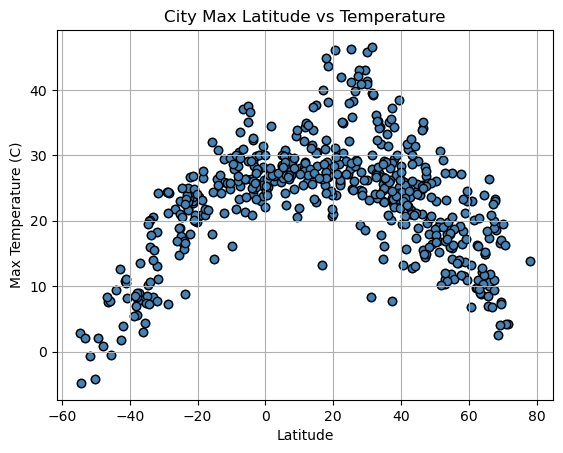

In [8]:
# Build scatter plot for latitude vs. temperature

x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x,y)
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

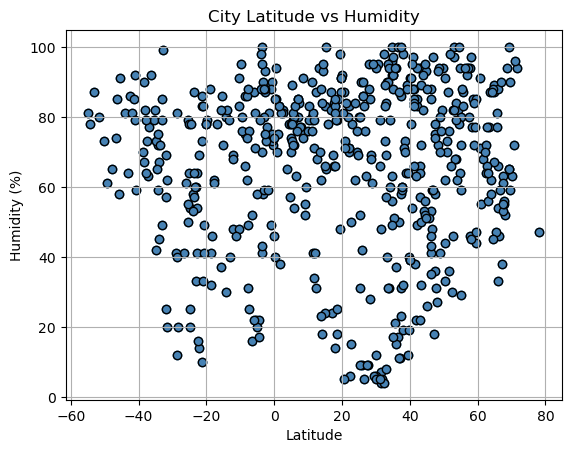

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.scatter(x,y)
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

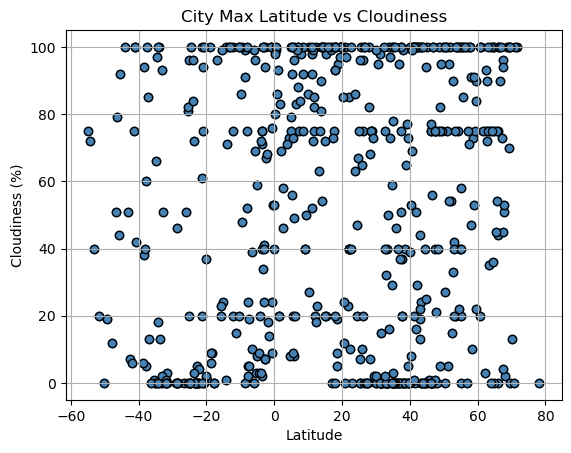

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

plt.scatter(x,y)
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

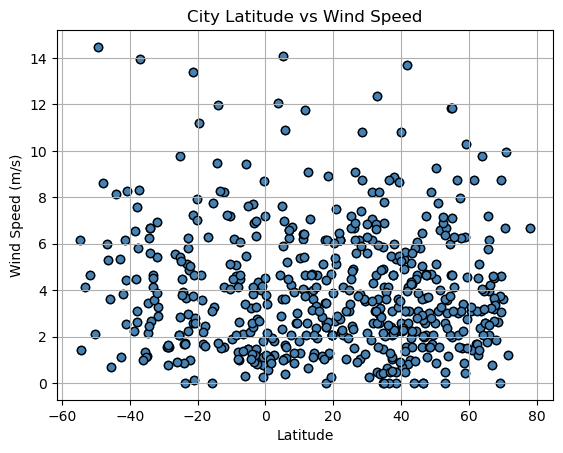

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.scatter(x,y)
plt.scatter(x, y, marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots

def Linear_Regression(x_values,y_values):
    
# Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
    plt.scatter(x_values,y_values) 

# Plot regression line
    plt.plot(x_values,regress_values,"r-")
    #change x_label location according x_values range
    x_label = min(x_values) + (max(x_values) - min(x_values)) * 0.05

    #change y_label location according y_values range
    y_label = min(y_values) + (max(y_values) - min(y_values)) * 0.05

    plt.annotate(line_eq,(x_label,y_label),fontsize=15,color="red")
    
        
# Print r square value
    print(f"The r-value is:{rvalue}")

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

 # Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,10.02,66,0,6.17,IS,1689515619
1,bilibino,68.0546,166.4372,18.66,52,2,1.87,RU,1689515619
2,emirgazi,37.9022,33.8372,29.50,19,0,8.88,TR,1689515619
3,college,64.8569,-147.8028,14.94,87,75,2.57,US,1689515528
6,sinan,34.8262,126.1086,23.06,96,29,4.90,KR,1689515620


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,fortaleza,-3.7227,-38.5247,29.07,70,75,7.72,BR,1689515411
5,luderitz,-26.6481,15.1594,21.77,41,0,5.56,NaN,1689515620
7,chonchi,-42.6128,-73.8092,1.73,86,7,1.13,CL,1689515620
8,port-aux-francais,-49.3500,70.2167,2.07,61,19,14.48,TF,1689515620
9,ushuaia,-54.8000,-68.3000,2.81,81,75,6.17,AR,1689515621


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.6015621460646482


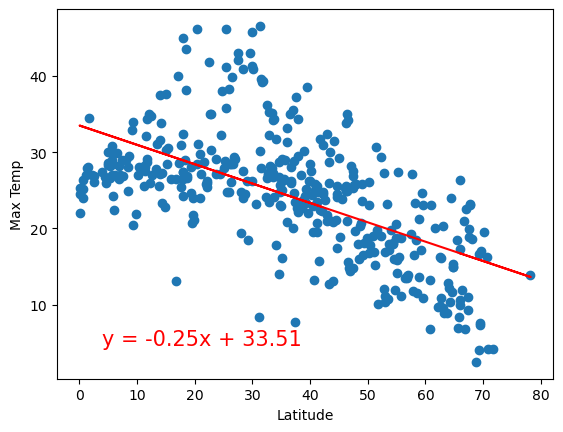

In [62]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Show plot
plt.show()

The r-value is:0.8640229191424473


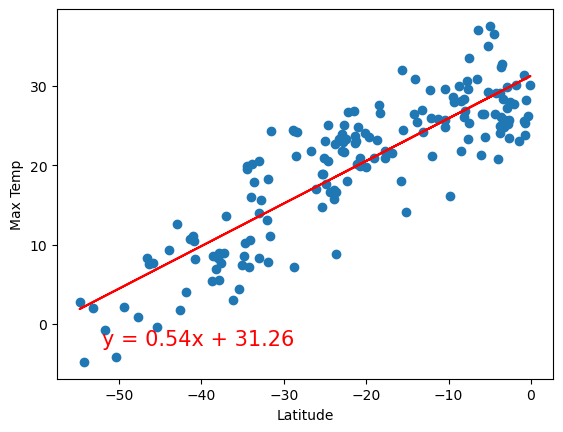

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Show plot
plt.show()

**Discussion about the linear relationship:** 
**Northern Hemisphere:** negative correlation, as the latitude increases and the temperature drops. **Southern Hemisphere:** positive correlation, as latitude increases, temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.002398927386455246


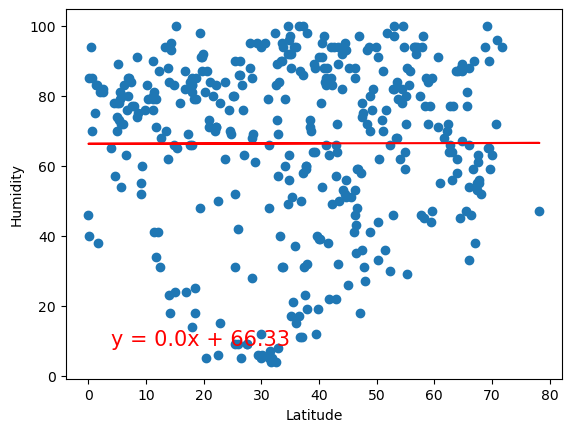

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Show plot
plt.show()

The r-value is:-0.048764830718816474


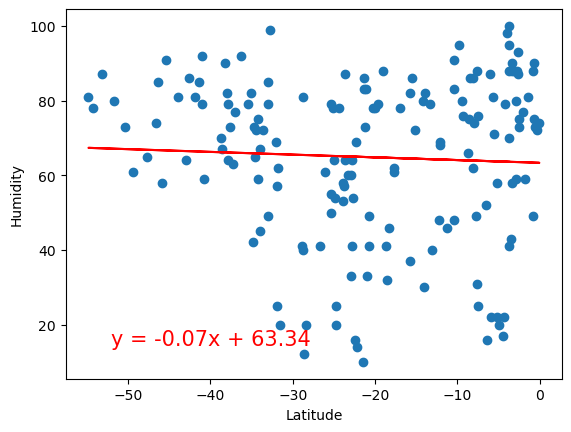

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Show plot
plt.show()

**Discussion about the linear relationship:**  **Northern Hemisphere:** there is no correlation between latitude and humidity  **Southern Hemisphere:** 
a slope with an almost zero inclination is observed, indicating that the correlation between latitude and humidity in this hemisphere is almost zero. For example, you can see two points near latitude -28, one with humidity 20 and another with humidity 100.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.061492567583739985


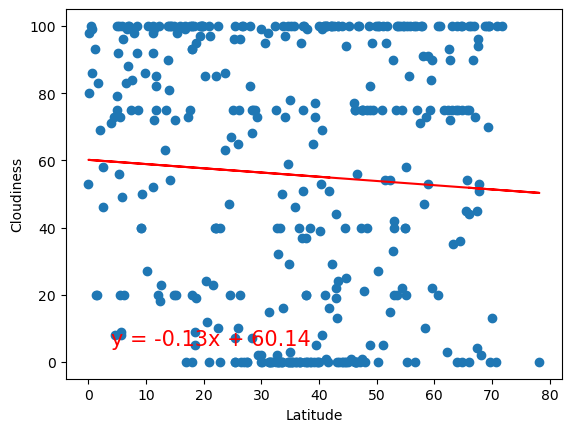

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Show plot
plt.show()

The r-value is:0.08455872799896998


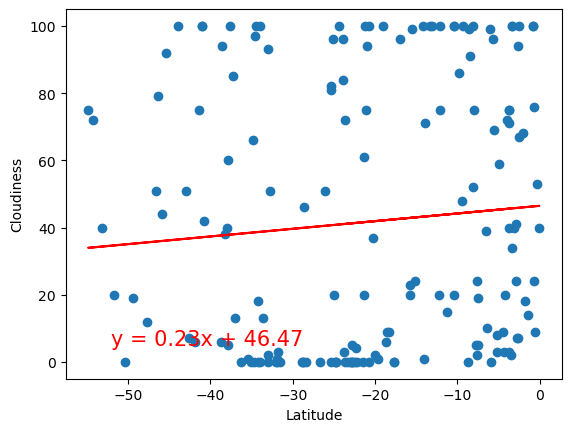

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Show plot
plt.show()

**Discussion about the linear relationship:**  **Northern Hemisphere:**  there is no correlation between latitude and cloudiness. a concentration of points is observed in cloudiness 100 and in 0 **Southern Hemisphere:** no marked correlation is observed between Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.008289761567766285


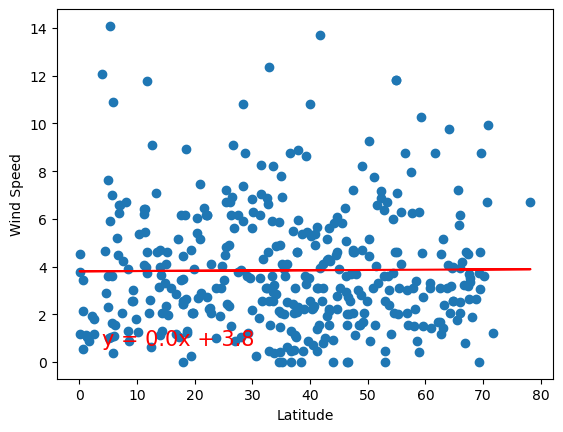

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Show plot
plt.show()

The r-value is:-0.1544627136461283


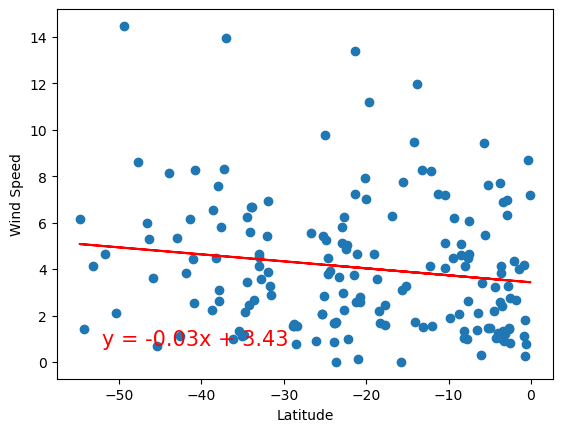

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

Regression = Linear_Regression(x_values,y_values)
     
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Show plot
plt.show()

**Discussion about the linear relationship:** **Northern Hemisphere:** there is no correlation between latitude and wind speed.a greater accumulation of points is observed in wind speeds below 8
 **Southern Hemisphere:** a negative trend is observed, as the latitude approaches 0, the wind speed tends to decrease